In [1]:
from google.colab import files
uploaded = files.upload()


Saving latihan_timeseries.csv to latihan_timeseries.csv


In [3]:
import pandas as pd

df = pd.read_csv('latihan_timeseries.csv')
print(df)


                nama  tanggal_lahir
0     Adompo Nugroho     12-08-1990
1    Ayyash Ramadhan     1993/07/24
2       Dewi Lestari    01 Jan 1991
3       Rizky Arsyad     1992-04-15
4        Yusuf Ayyub  15 Maret 1989
5      Putri Anindya     1990.09.30
6      Andi Setiawan     30/12/1991
7  Nadia Khairunnisa     1991-13-01
8     Hendra Saputra     1994-02-28
9     Siti Rahmawati     02-29-1992


In [4]:
df['tanggal_lahir_parsed'] = pd.to_datetime(df['tanggal_lahir'], errors='coerce', dayfirst=True)


In [5]:
df[df['tanggal_lahir_parsed'].isna()]

,nama,tanggal_lahir,tanggal_lahir_parsed
1,Ayyash Ramadhan,1993/07/24,NaT
2,Dewi Lestari,01 Jan 1991,NaT
3,Rizky Arsyad,1992-04-15,NaT
4,Yusuf Ayyub,15 Maret 1989,NaT
5,Putri Anindya,1990.09.30,NaT
6,Andi Setiawan,30/12/1991,NaT
7,Nadia Khairunnisa,1991-13-01,NaT
8,Hendra Saputra,1994-02-28,NaT
9,Siti Rahmawati,02-29-1992,NaT


In [6]:
median_date = df['tanggal_lahir_parsed'].dropna().median()
df['tanggal_lahir_parsed'] = df['tanggal_lahir_parsed'].fillna(median_date)

In [7]:
df

,nama,tanggal_lahir,tanggal_lahir_parsed
0,Adompo Nugroho,12-08-1990,1990-08-12
1,Ayyash Ramadhan,1993/07/24,1990-08-12
2,Dewi Lestari,01 Jan 1991,1990-08-12
3,Rizky Arsyad,1992-04-15,1990-08-12
4,Yusuf Ayyub,15 Maret 1989,1990-08-12
5,Putri Anindya,1990.09.30,1990-08-12
6,Andi Setiawan,30/12/1991,1990-08-12
7,Nadia Khairunnisa,1991-13-01,1990-08-12
8,Hendra Saputra,1994-02-28,1990-08-12
9,Siti Rahmawati,02-29-1992,1990-08-12


In [8]:
df['tahun'] = df['tanggal_lahir_parsed'].dt.year
df['bulan'] = df['tanggal_lahir_parsed'].dt.month
df['hari'] = df['tanggal_lahir_parsed'].dt.day
df['nama_hari'] = df['tanggal_lahir_parsed'].dt.day_name()

In [9]:
print(df)

                nama  tanggal_lahir tanggal_lahir_parsed  tahun  bulan  hari  \
0     Adompo Nugroho     12-08-1990           1990-08-12   1990      8    12   
1    Ayyash Ramadhan     1993/07/24           1990-08-12   1990      8    12   
2       Dewi Lestari    01 Jan 1991           1990-08-12   1990      8    12   
3       Rizky Arsyad     1992-04-15           1990-08-12   1990      8    12   
4        Yusuf Ayyub  15 Maret 1989           1990-08-12   1990      8    12   
5      Putri Anindya     1990.09.30           1990-08-12   1990      8    12   
6      Andi Setiawan     30/12/1991           1990-08-12   1990      8    12   
7  Nadia Khairunnisa     1991-13-01           1990-08-12   1990      8    12   
8     Hendra Saputra     1994-02-28           1990-08-12   1990      8    12   
9     Siti Rahmawati     02-29-1992           1990-08-12   1990      8    12   

  nama_hari  
0    Sunday  
1    Sunday  
2    Sunday  
3    Sunday  
4    Sunday  
5    Sunday  
6    Sunday  
7    Su

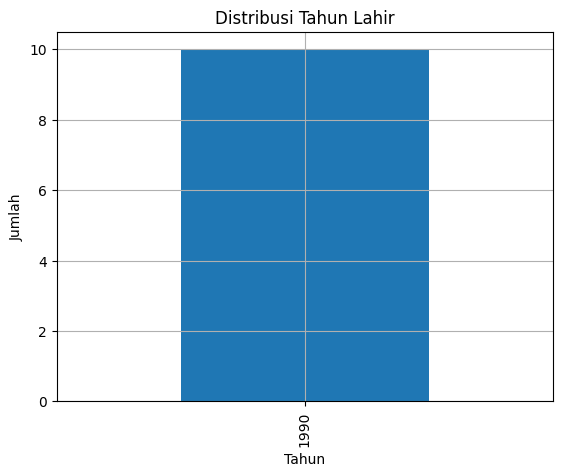

In [10]:
import matplotlib.pyplot as plt

df['tahun'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Tahun Lahir')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()